### Imports


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

import os 
import numpy as np 
import matplotlib.pyplot as plt
import copy
sys.path.append('../../')

import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

#folder = 'My Drive/Projects/Materials/'
folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

meas = 'full_qubitB'
#meas = 'silicon-scalinq-0'
#meas = 'silicon-waffle-1108'
#meas = 'silicon-waffle-phase'
meas = 'sil3b_vna2'
meas = 'sil4a_vna'

ModuleNotFoundError: No module named 'meas_analysis.handy'

In [ ]:
import yaml

with open('resonator_meas.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

#data_pth = pth_base+folder+'Data/'+params['pth'][ind]
data_pth = pth_base+folder+params['pth'][ind]
img_name = params['pth'][ind][0:-1] +params['meas'][ind]

0


In [ ]:
sample_dict
params['temp']=0.04 
if 'slope' in params: 
    slope=params['slope'][ind]
else: 
    slope=0

In [ ]:
params

{'atten': -50,
 'dir': [['ResAsample1_power_sweep_7/']],
 'flip': True,
 'max_power': 5,
 'meas': ['sil4a_vna'],
 'meas_type': ['vna'],
 'min_power': -150,
 'nfiles': [1],
 'slope': [0],
 'pitch': [10, 12, 14, 2, 16, 4, 6, 8],
 'pth': ['022125_Resonator/'],
 'target_freq': [5.9, 6.2, 6.5, 6.7, 7, 7.2, 7.5, 7.9],
 'temp': 0.04}

## Sweep power/temp, plot results

### Run sweep 

Counter({7145647: 9, 6349648: 9, 6707620: 9, 8041225: 9, 6016571: 9, 7537941: 9, 6821934: 9, 7018287: 9})
Counter({7145647: 9, 6349648: 9, 6707620: 9, 8041225: 9, 6016571: 9, 7537941: 9, 6821934: 9, 7018287: 9})
['res_6016571_70dbm', 'res_6016571_65dbm', 'res_6016571_60dbm', 'res_6016571_55dbm', 'res_6016571_50dbm', 'res_6016571_45dbm', 'res_6016571_40dbm', 'res_6016571_35dbm', 'res_6016571_30dbm']
['res_6349648_70dbm', 'res_6349648_65dbm', 'res_6349648_60dbm', 'res_6349648_55dbm', 'res_6349648_50dbm', 'res_6349648_45dbm', 'res_6349648_40dbm', 'res_6349648_35dbm', 'res_6349648_30dbm']
['res_6707620_70dbm', 'res_6707620_65dbm', 'res_6707620_60dbm', 'res_6707620_55dbm', 'res_6707620_50dbm', 'res_6707620_45dbm', 'res_6707620_40dbm', 'res_6707620_35dbm', 'res_6707620_30dbm']
['res_6821934_70dbm', 'res_6821934_65dbm', 'res_6821934_60dbm', 'res_6821934_55dbm', 'res_6821934_50dbm', 'res_6821934_45dbm', 'res_6821934_40dbm', 'res_6821934_35dbm', 'res_6821934_30dbm']
['res_7018287_70dbm', 'res_7

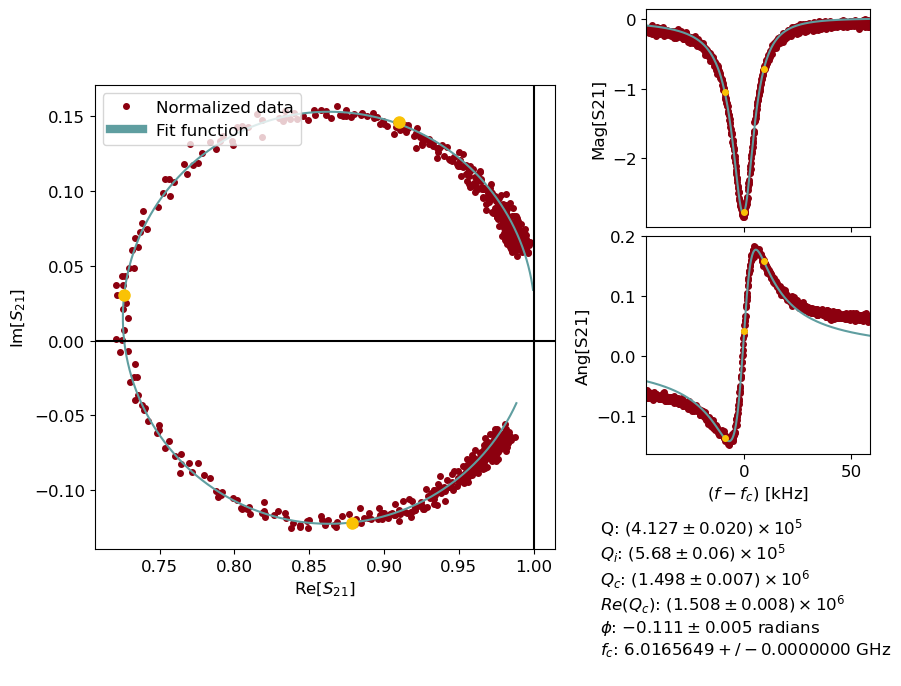

-65.0


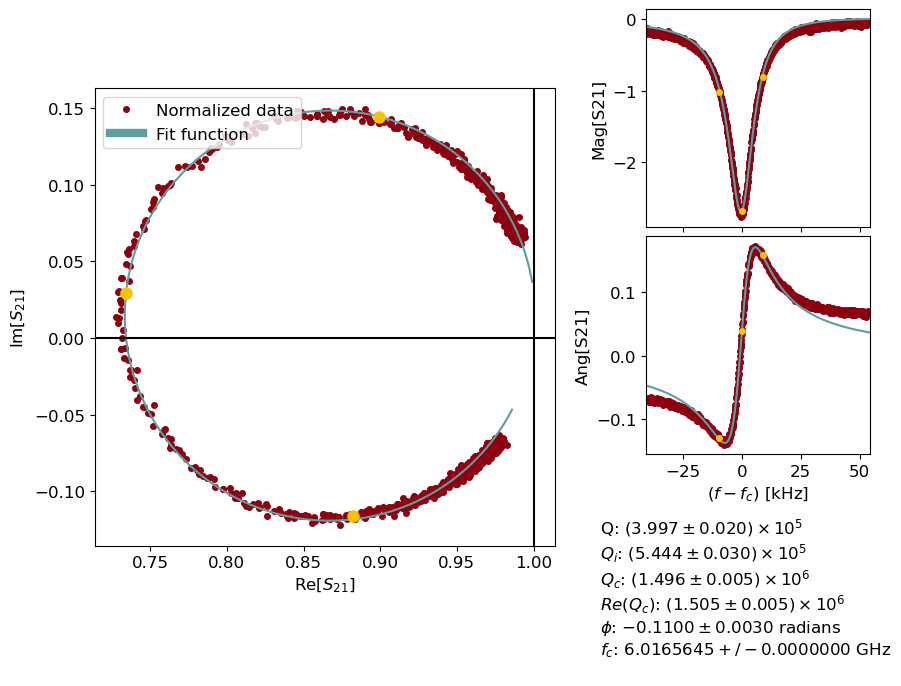

-60.0


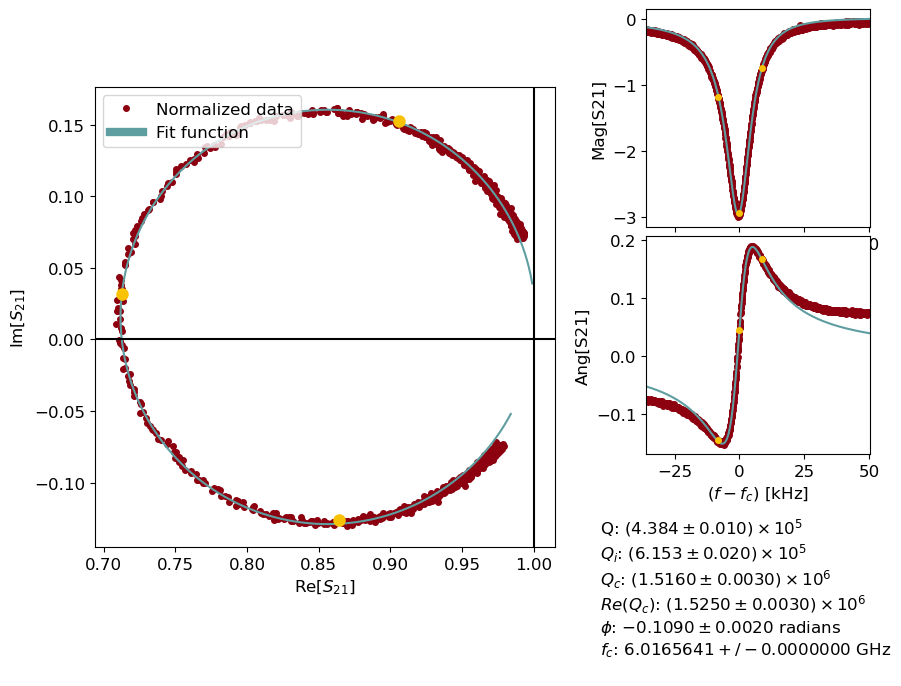

-55.0


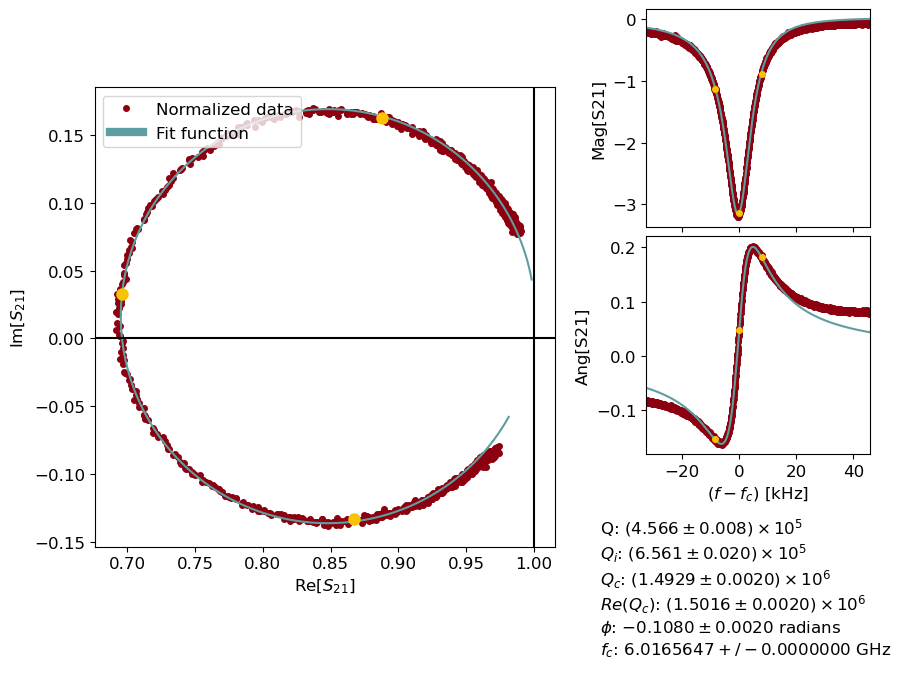

-50.0


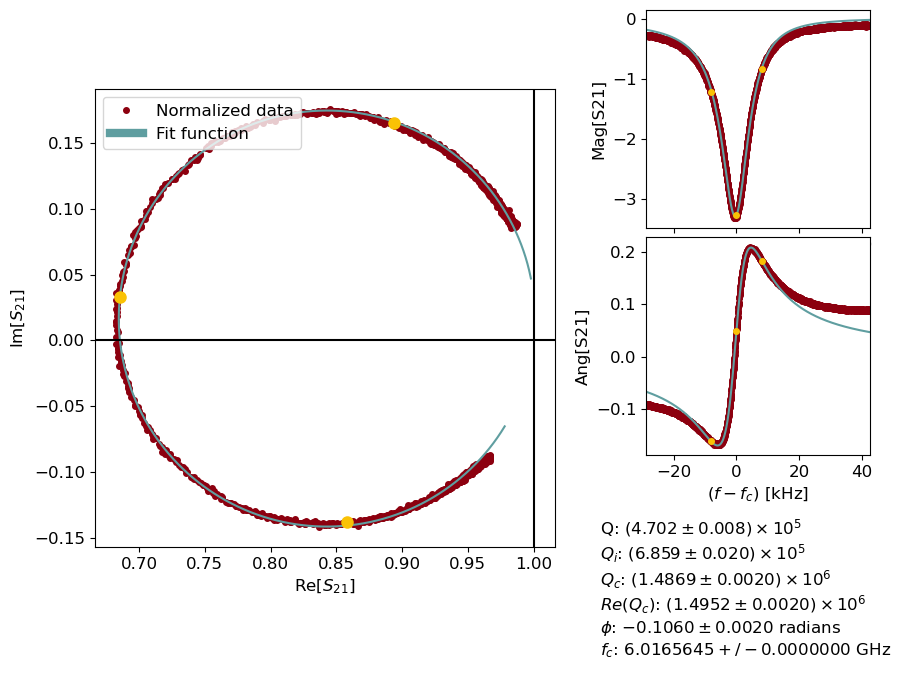

-45.0


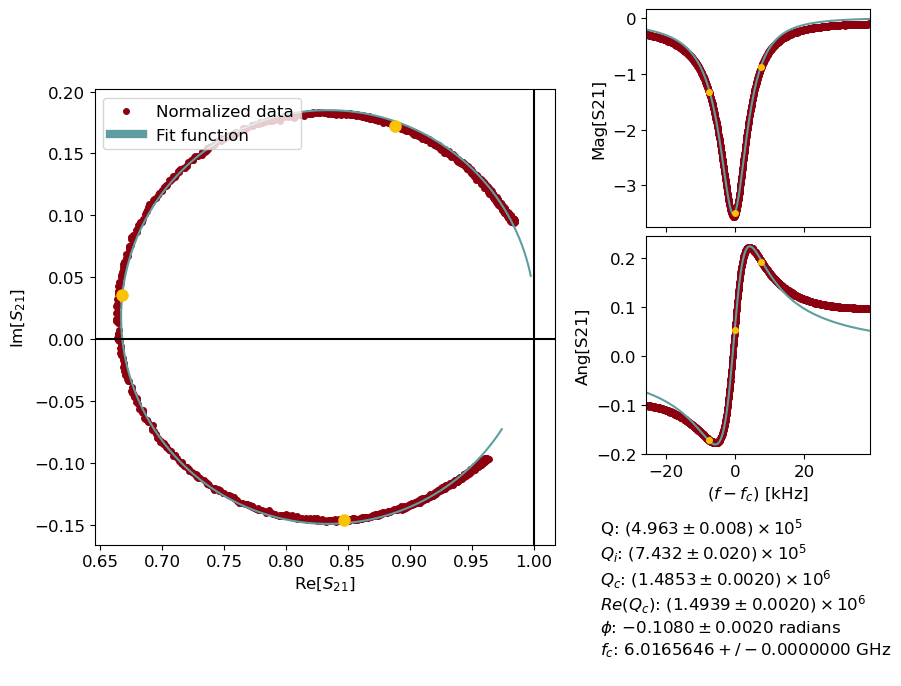

-40.0


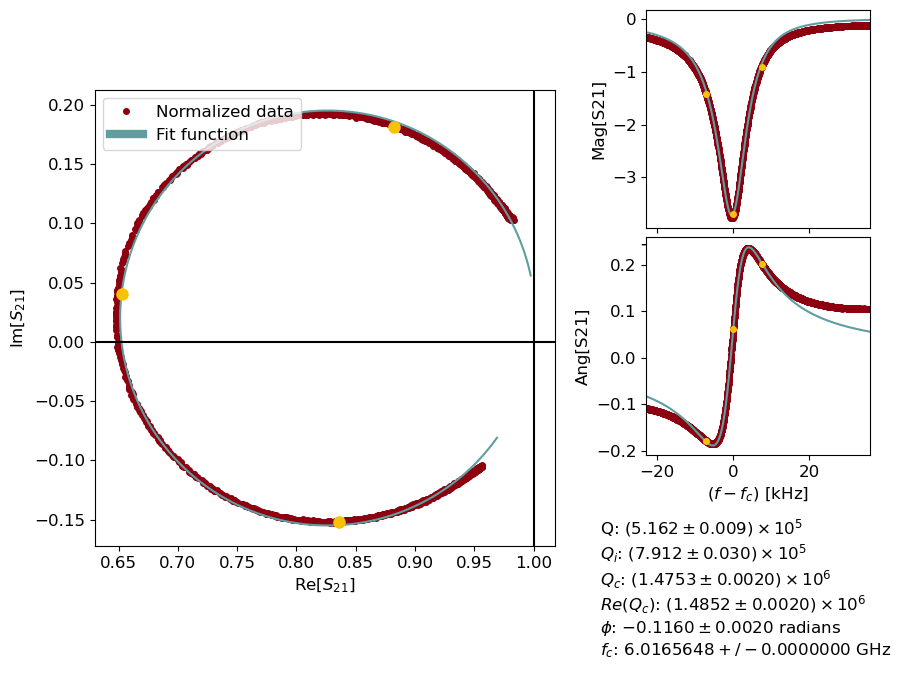

-35.0


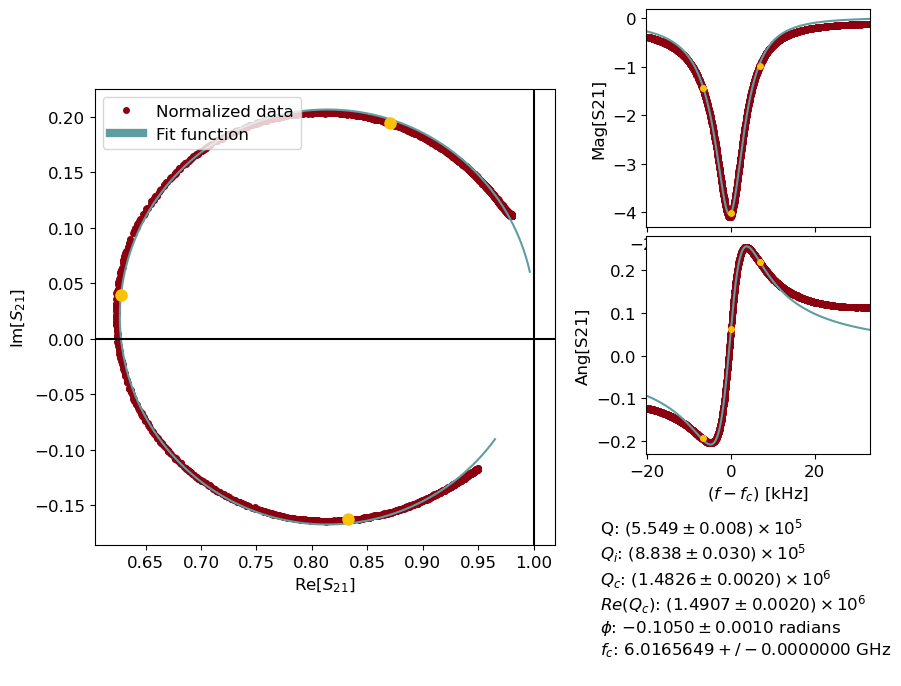

-30.0


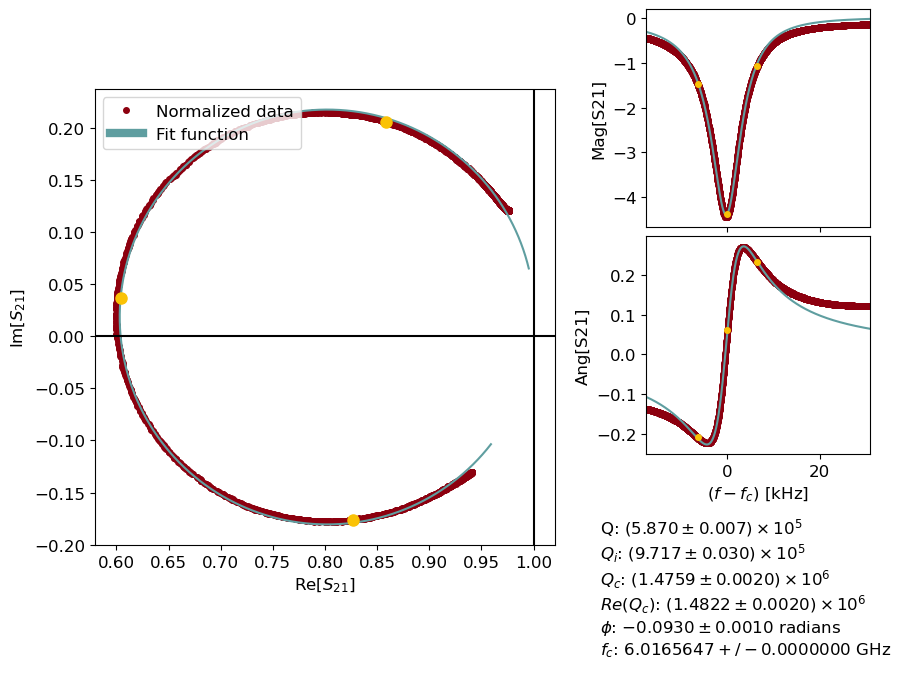

Time elapsed:  147.01897311210632
-70.0


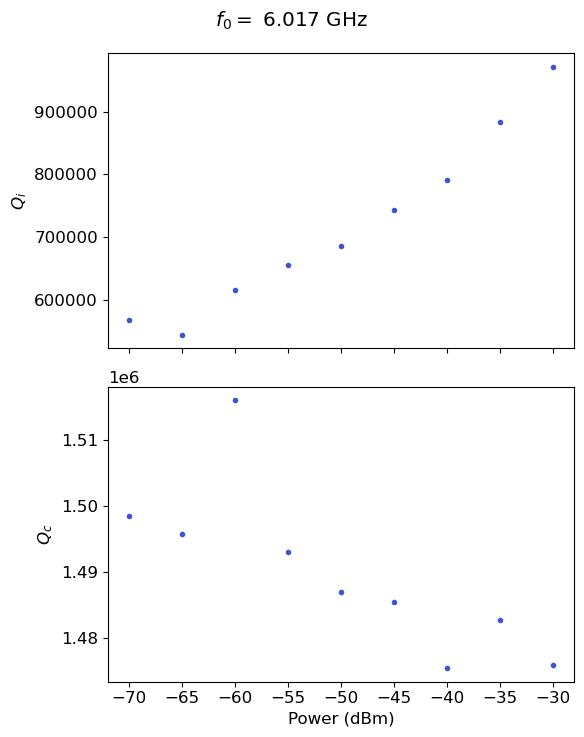

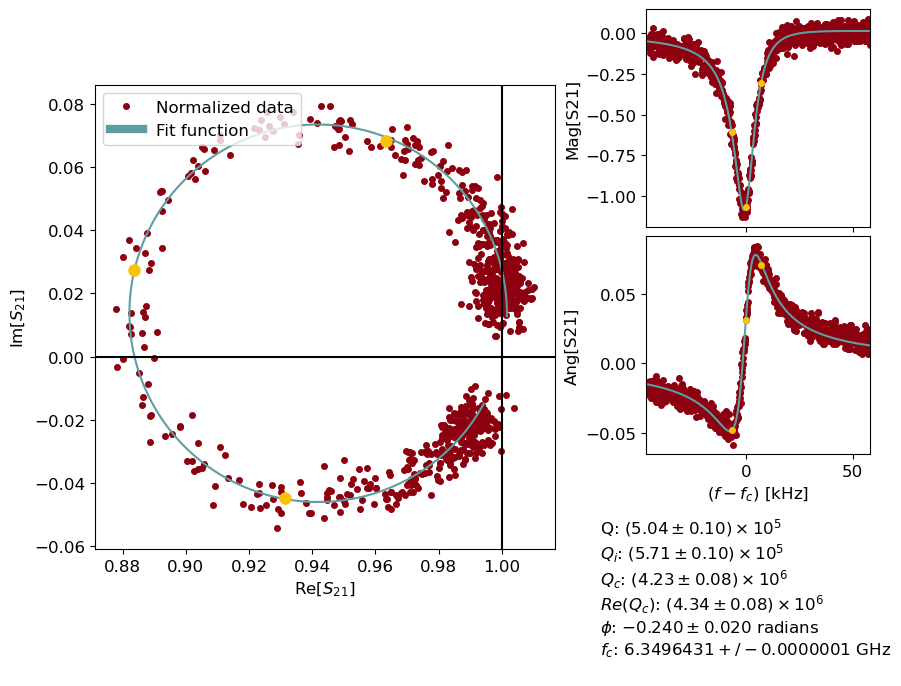

-65.0


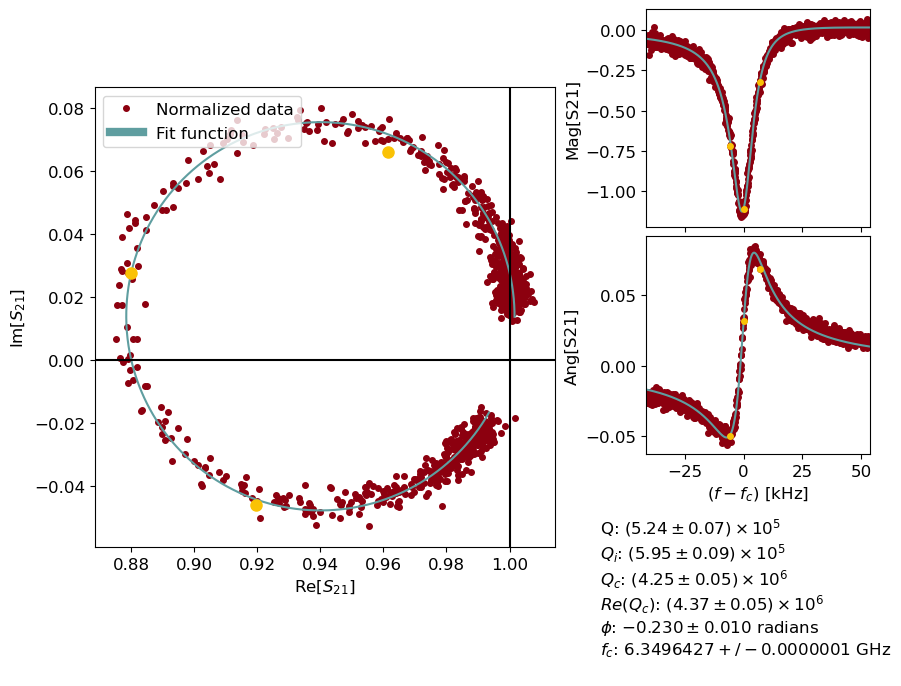

-60.0


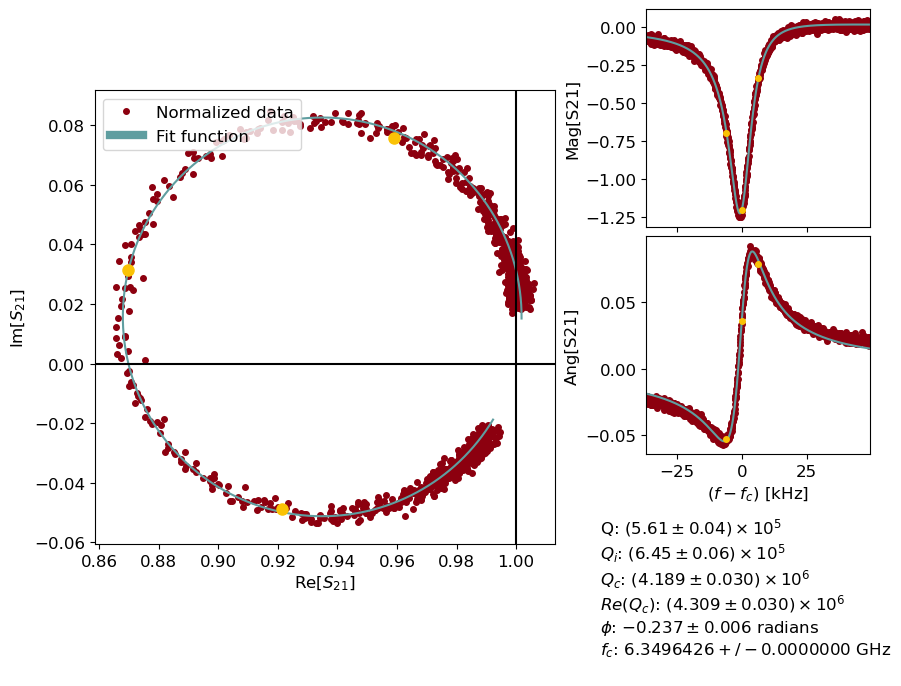

-55.0


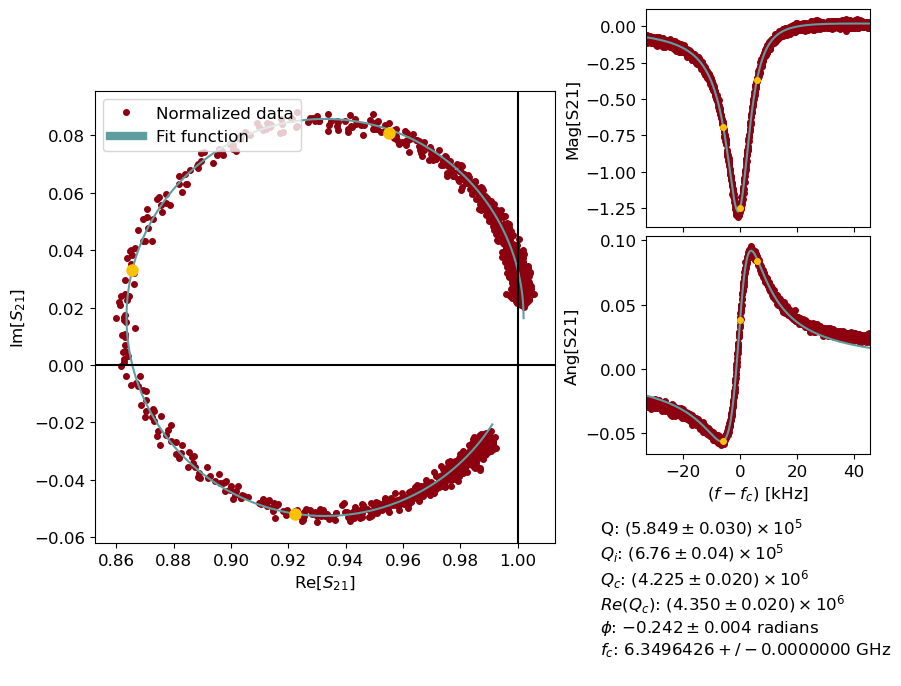

-50.0


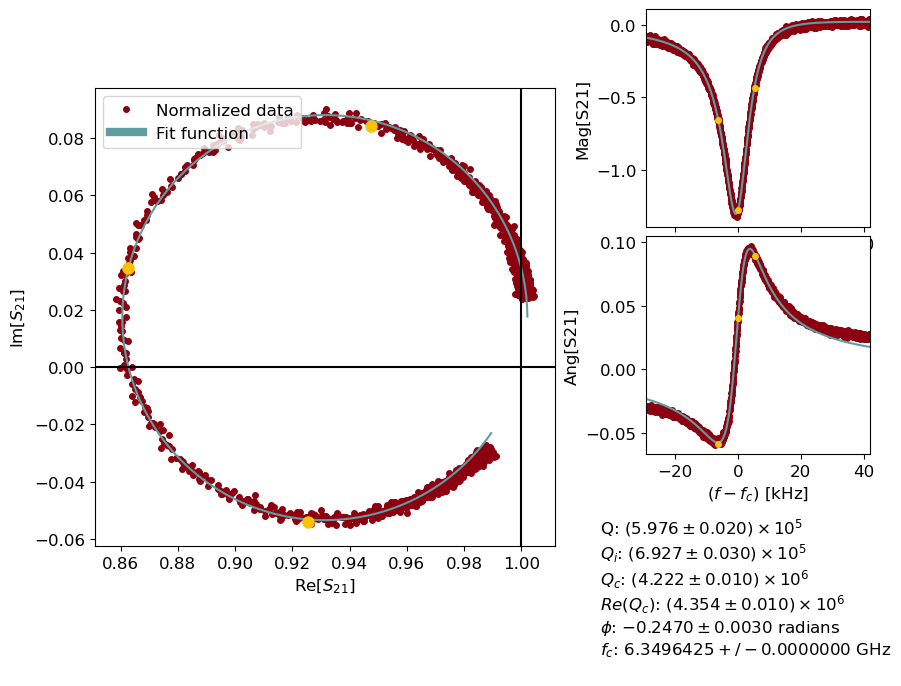

-45.0


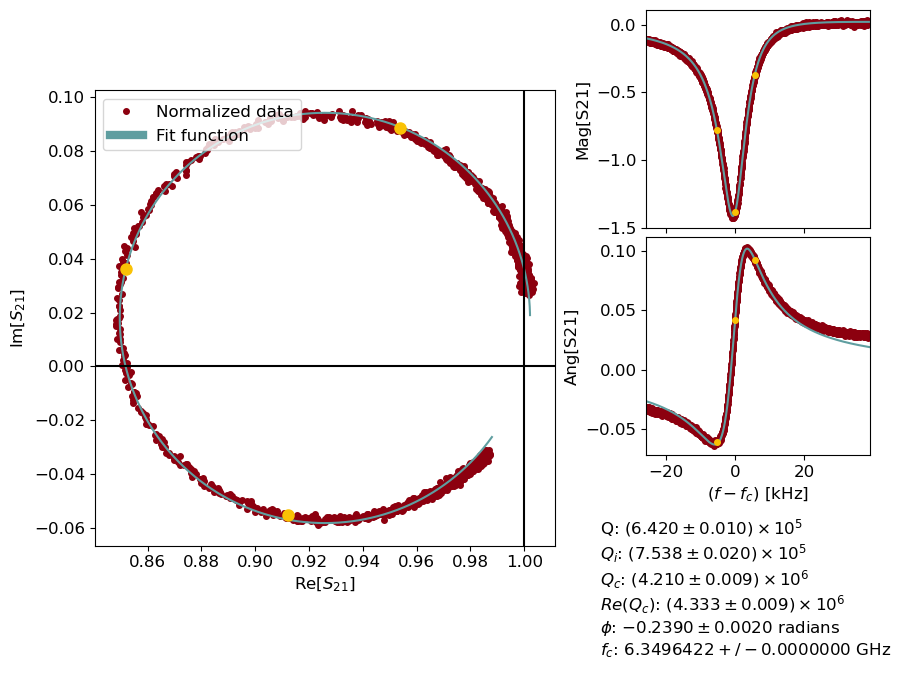

-40.0


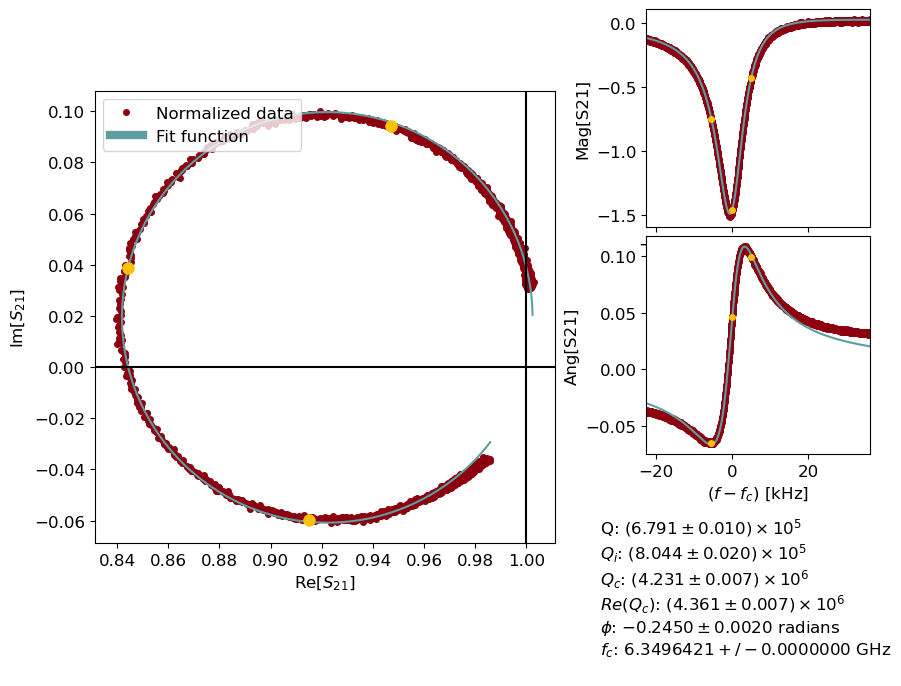

-35.0


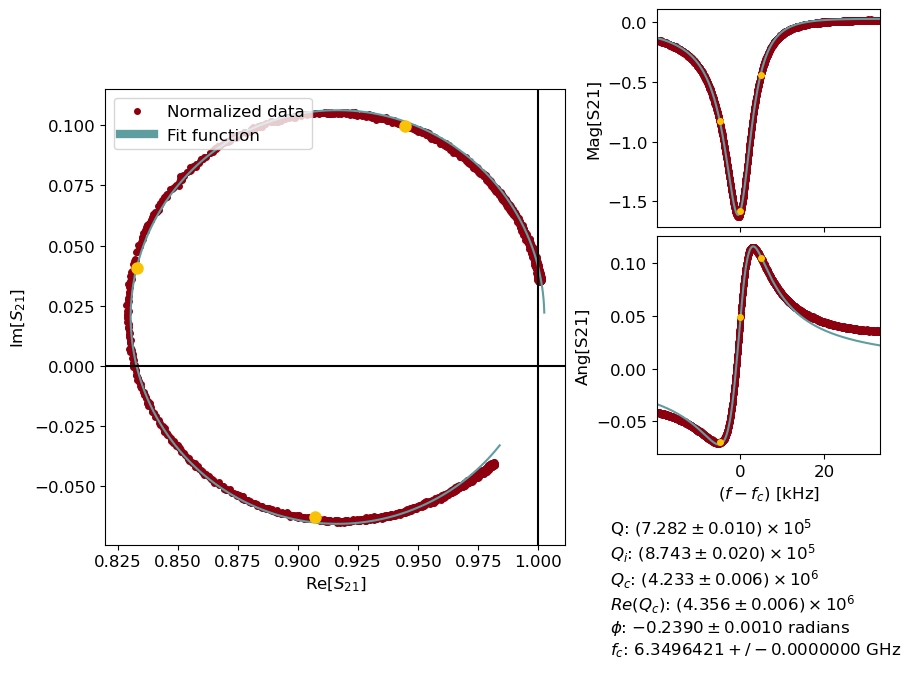

-30.0


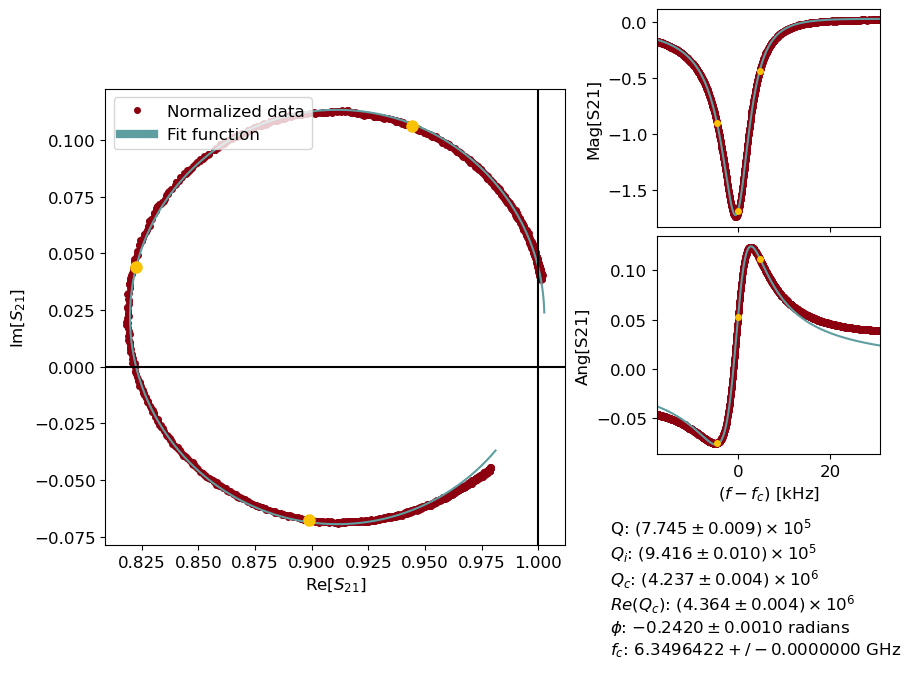

Time elapsed:  366.8524160385132
-70.0


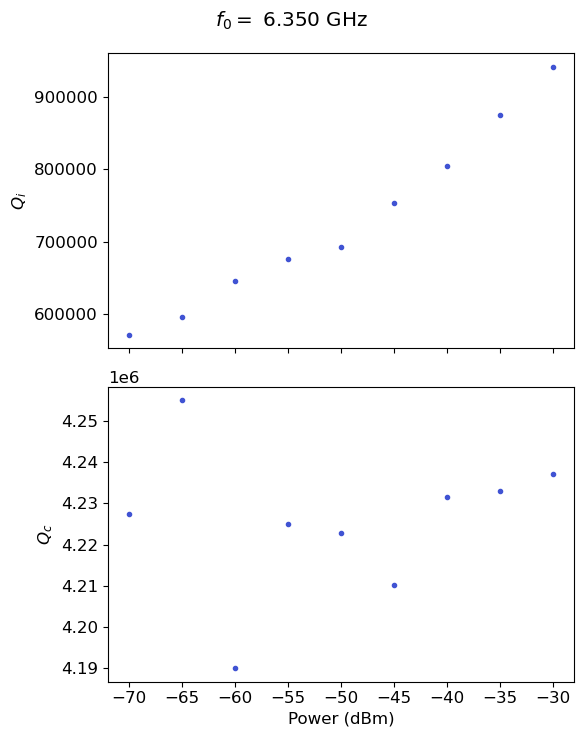

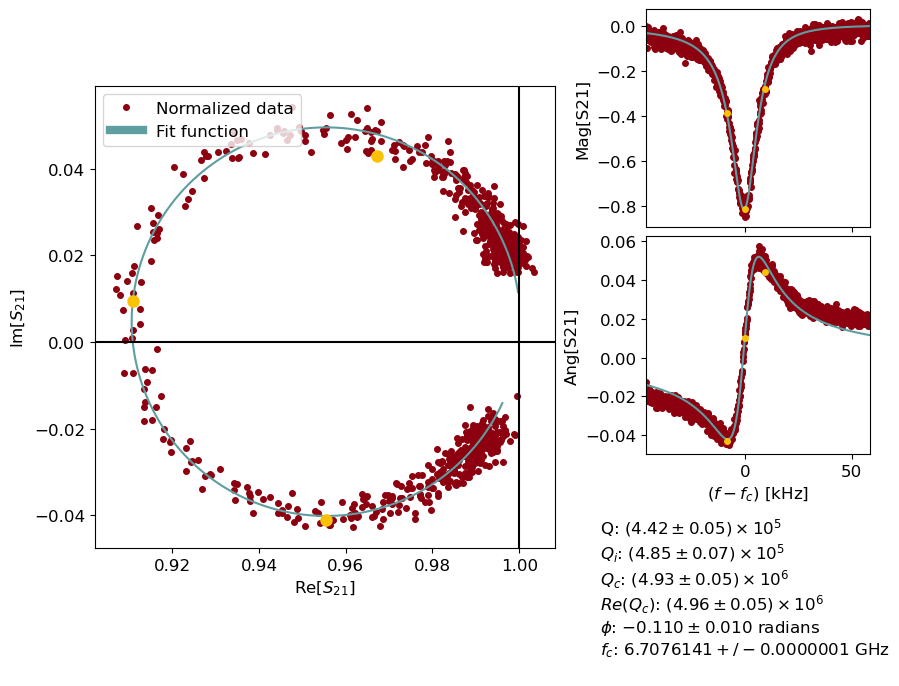

-65.0


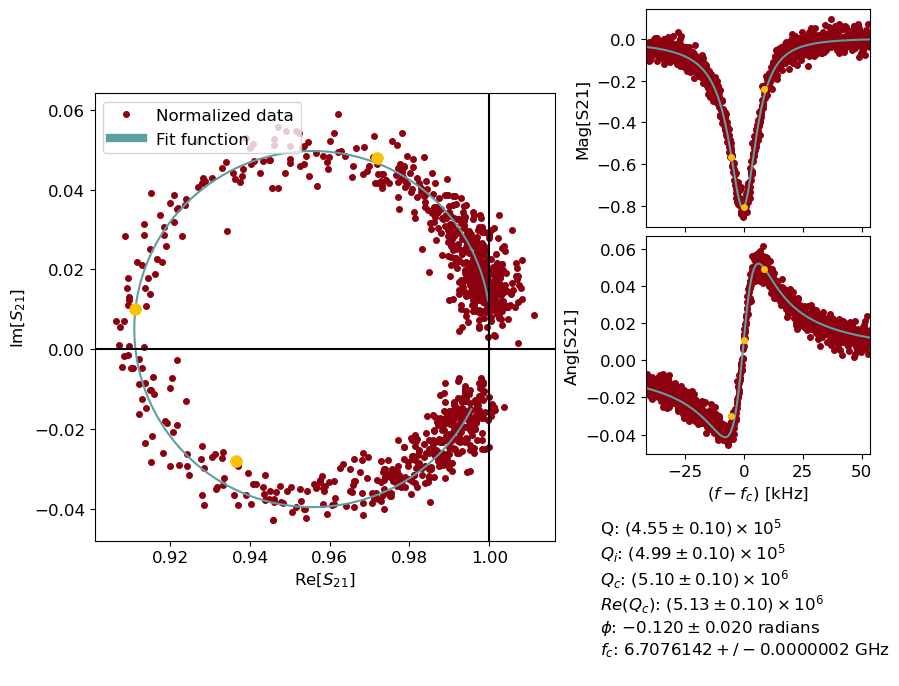

-60.0


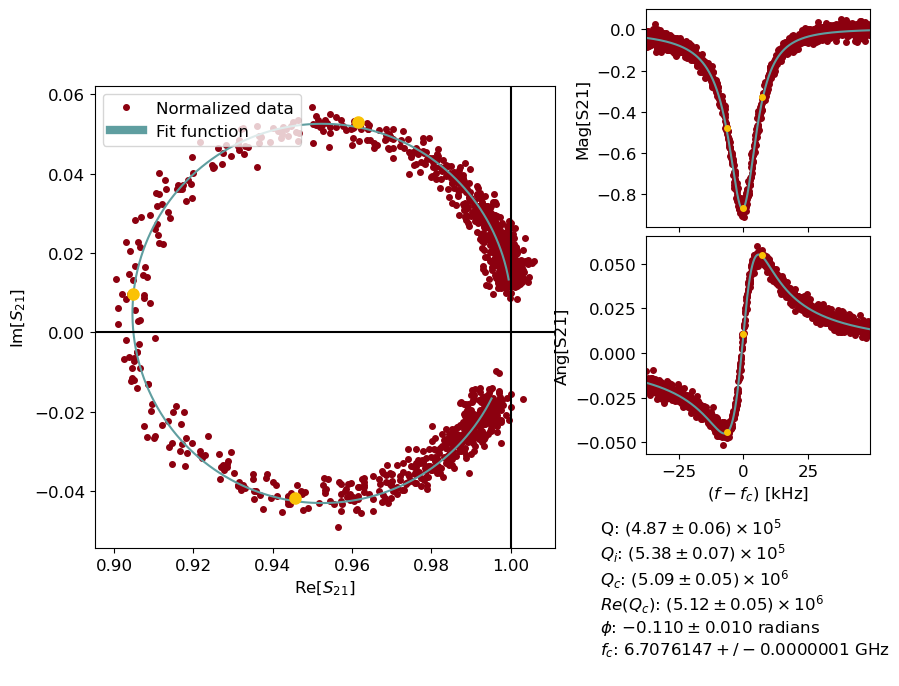

-55.0


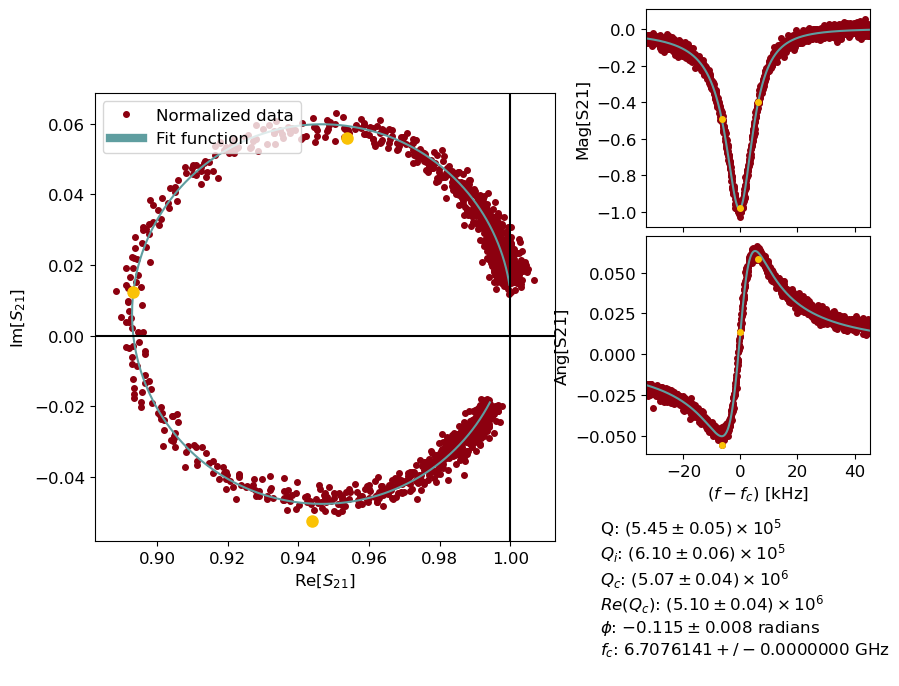

-50.0


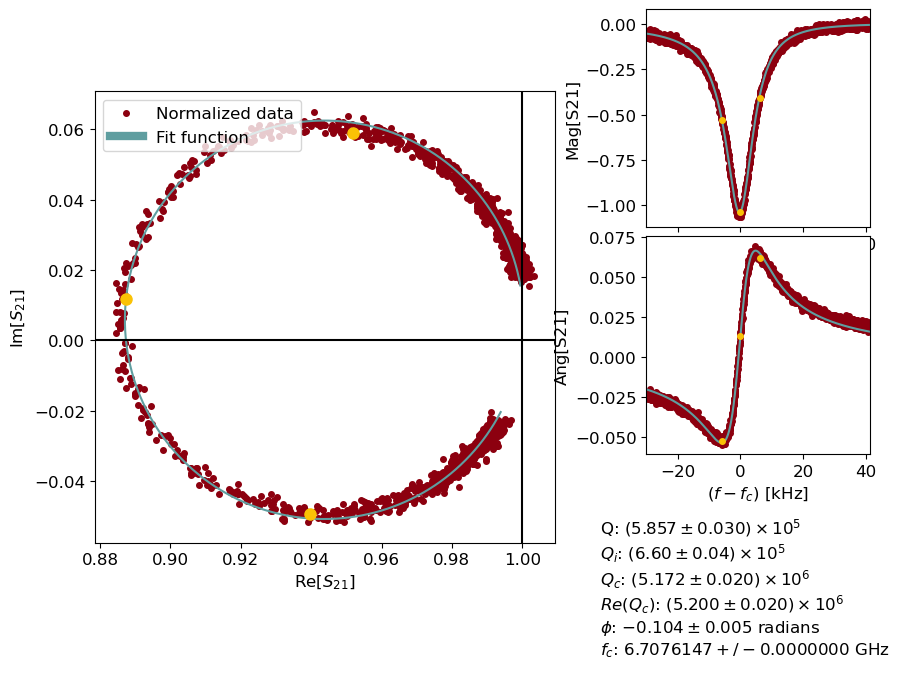

-45.0


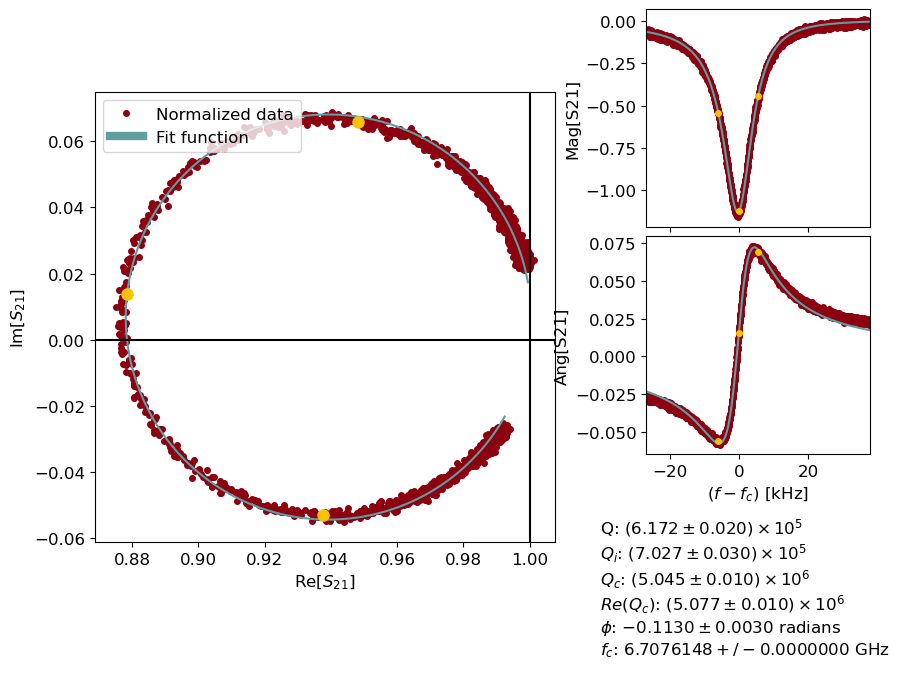

-40.0


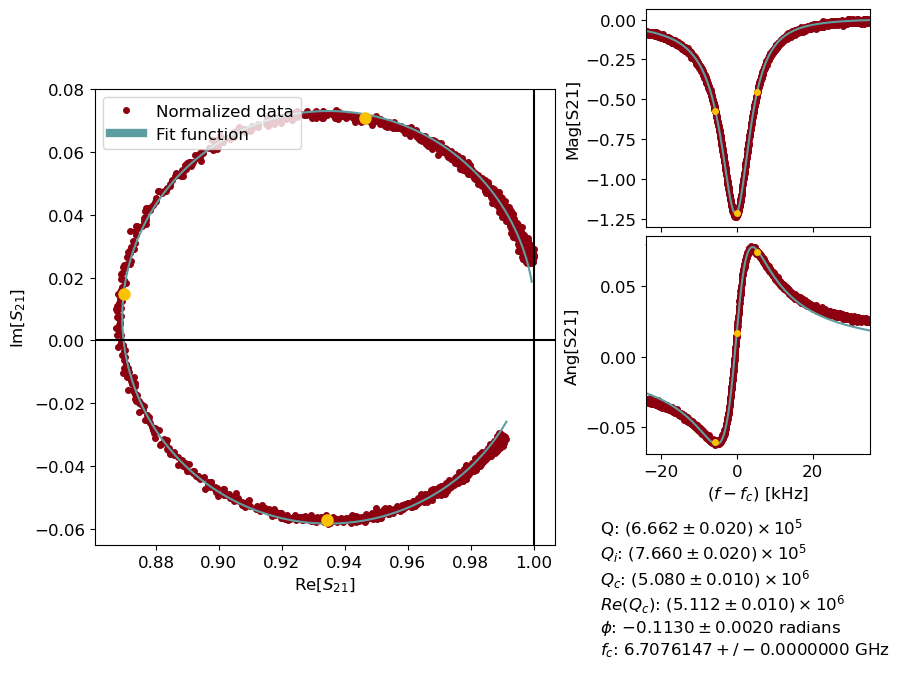

-35.0


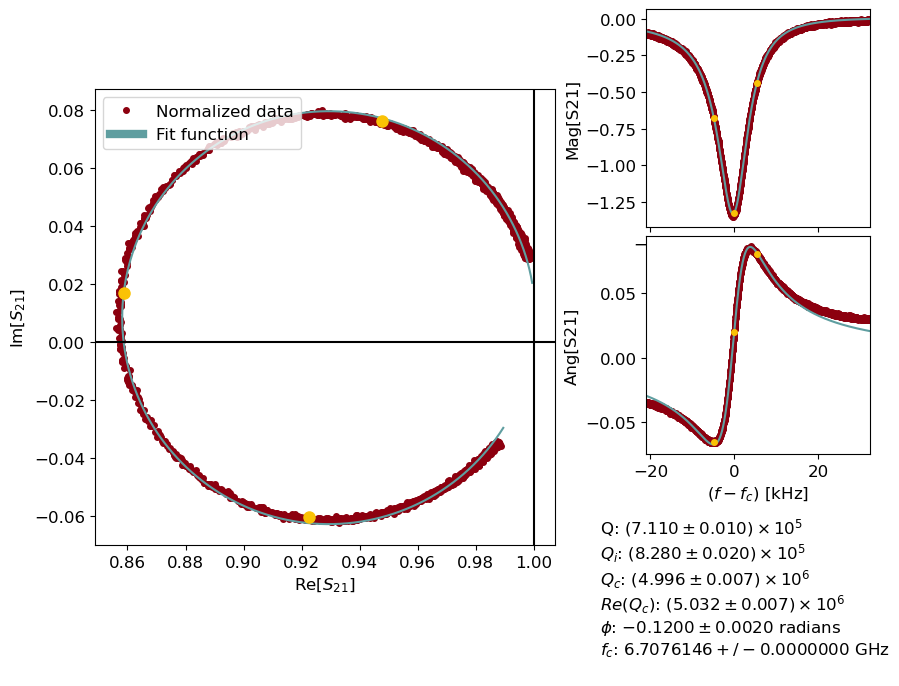

-30.0


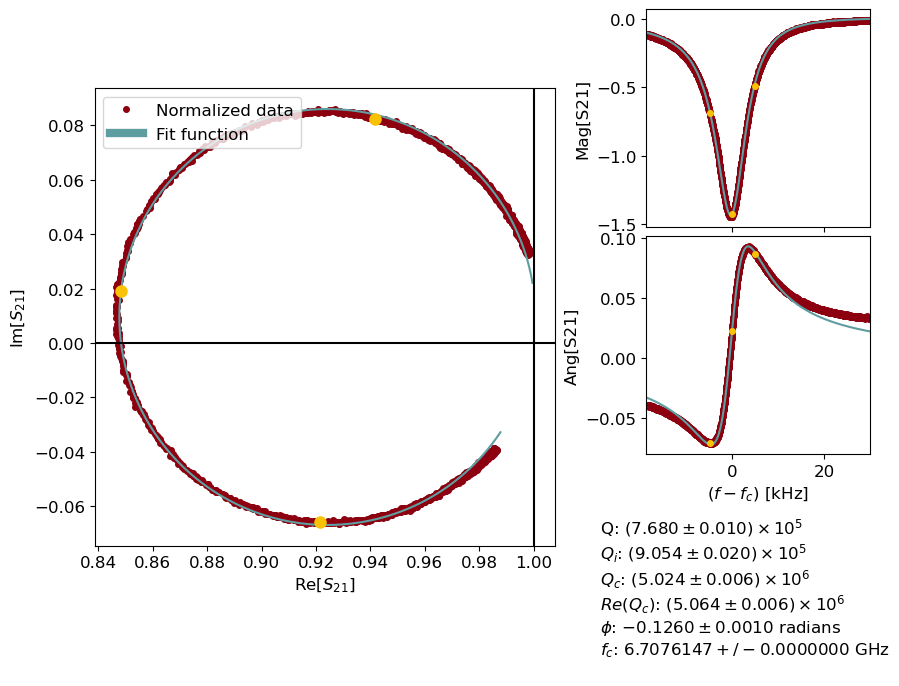

Time elapsed:  882.2397429943085
-70.0


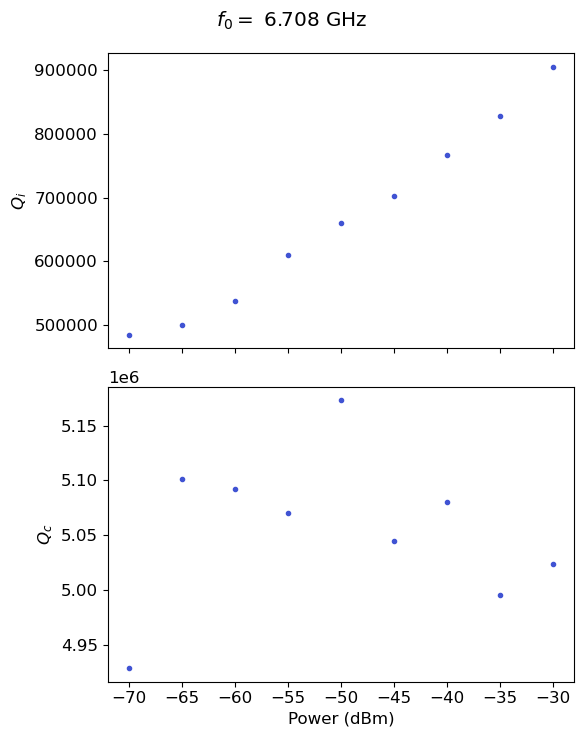

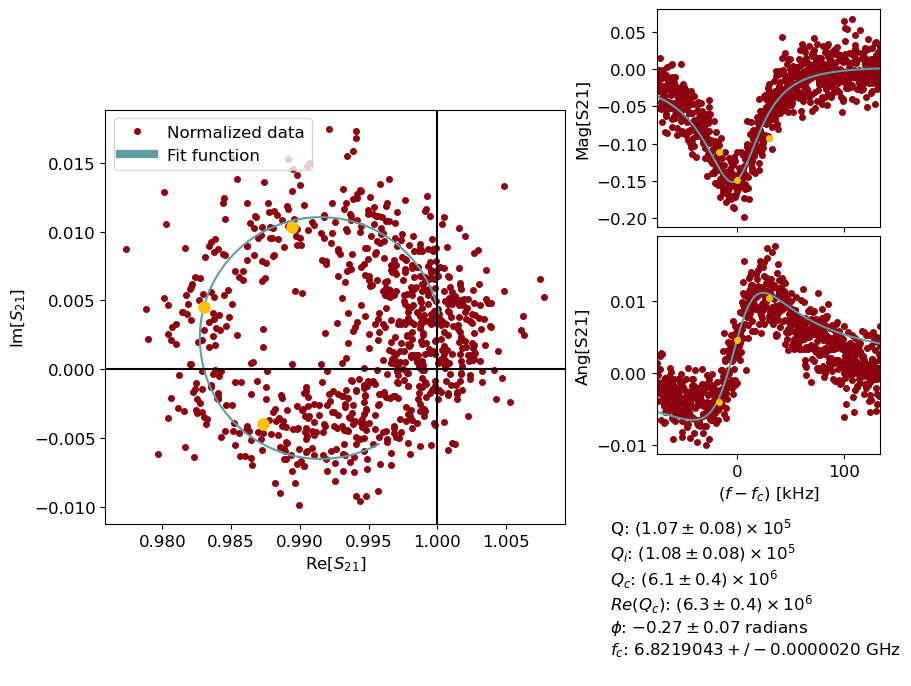

-65.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=118646.42925583835) = 0.0 < max(sigmas)
  warn(errmsg)


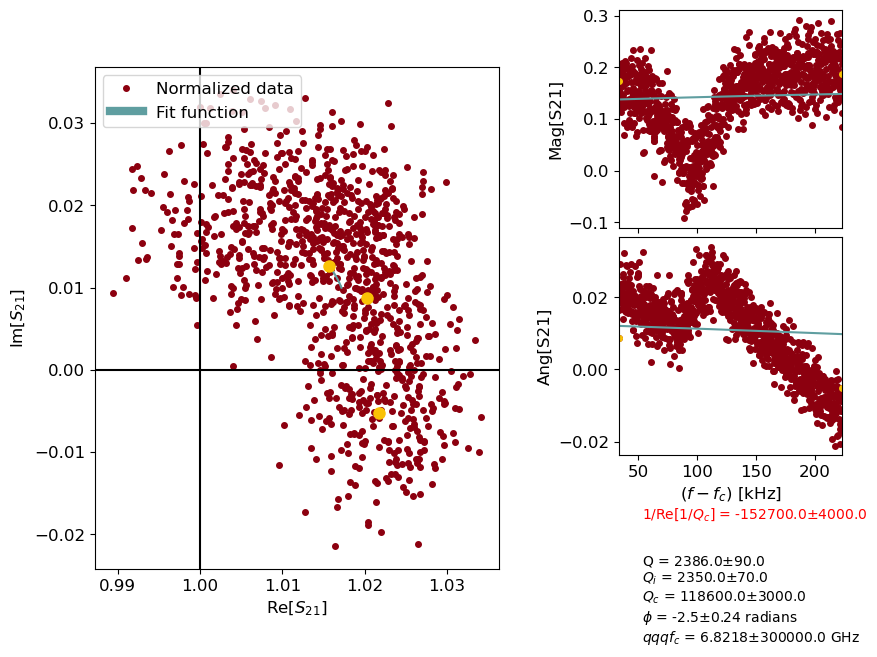

-60.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=1279763.956401077) = 0.0 < max(sigmas)
  warn(errmsg)


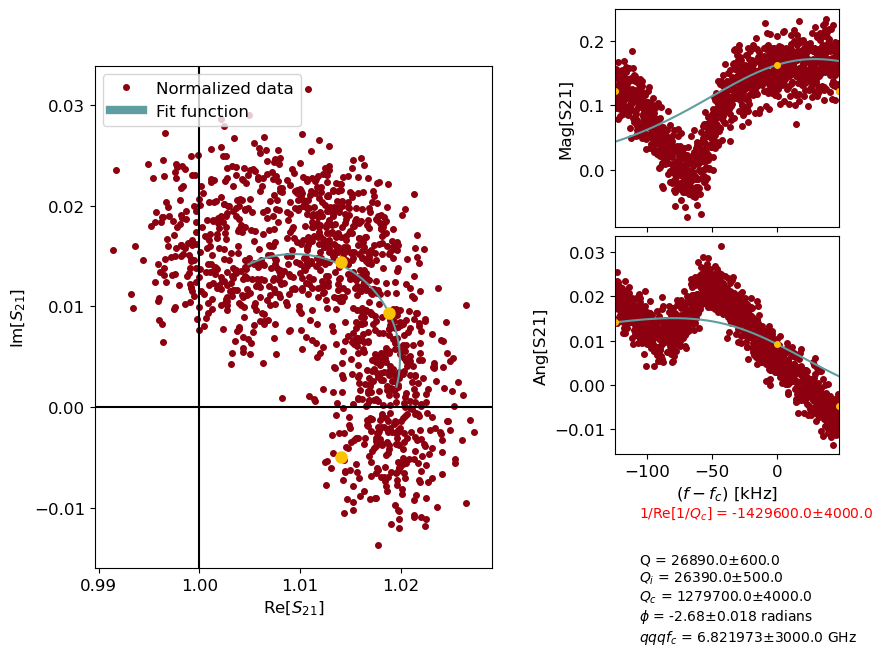

-55.0


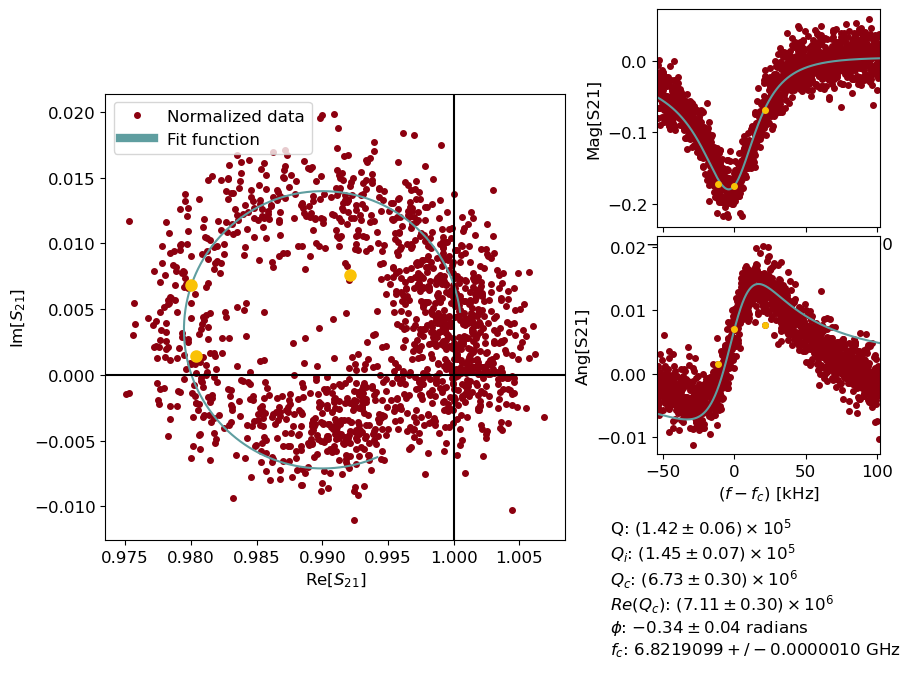

-50.0


/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Q=51818.24715265843) = 0.0 < max(sigmas)
  warn(errmsg)
/opt/anaconda3/lib/python3.11/site-packages/lmfit/confidence.py:317: UserWarning: Bound reached with prob(Qc=6325.141430075587) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/fit.py:1022: RuntimeWarning: divide by zero encountered in scalar power
  - (


>Error when trying to write parameters on plot
>cannot convert float infinity to integer


-45.0


KeyboardInterrupt: 

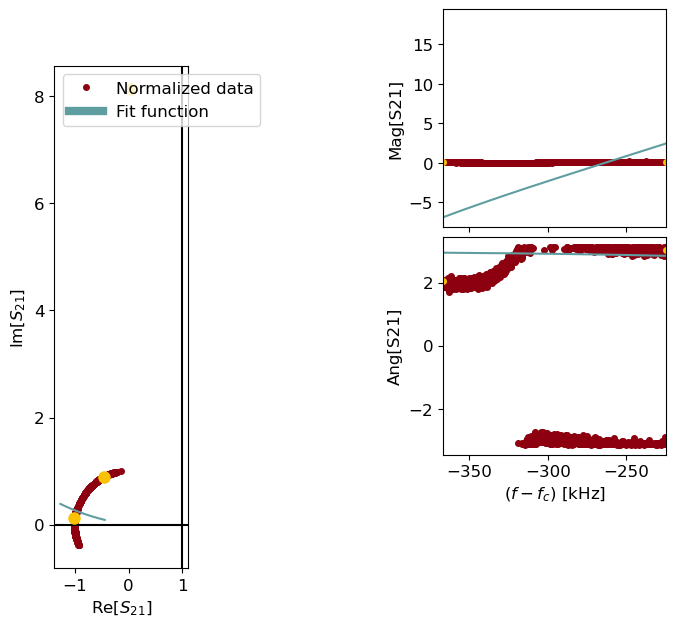

In [69]:
%matplotlib inline
res_params = ana_res.analyze_sweep_gen(params['dir'][ind], data_pth, name=meas, img_pth=img_pth, plot=True, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind], slope=slope, fitphase=True)

In [3]:

#slope=1135.027
%matplotlib inline
frac = 7.714986
fnames = ana_res.plot_all(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, min_power=-80, norm=False, half_norm=False, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope, name = img_name)#, slope=slope)

NameError: name 'ana_res' is not defined

In [ ]:
#fnames, res_params = ana_res.analyze_sweep_other(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope)#, slope=slope)

#### Reorder the data based on pitch (only run once)

In [ ]:

if params['meas_type']=='soc':
    res_params = ana_res.convert_power(res_params) 

params, res_params=ana_res.reorder(params, res_params) # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

In [ ]:
res_params[0]['qc'][0][2]=np.nan
with open('res_params.yaml', 'w') as file:
    for i in range(len(res_params)):
        rp = {key: value.tolist() if isinstance(value, np.ndarray) else value for key, value in res_params[0].items()}
        yaml.dump(rp, file)

In [ ]:
res_params[4]['qi'][0][-7]=np.nan

In [ ]:
res_params

[{'freqs': array([[6.8220e+09, 6.8215e+09,        nan, 6.8220e+09, 6.8220e+09,
          6.8220e+09, 6.8219e+09, 6.8219e+09, 6.8220e+09, 6.8220e+09,
          6.8219e+09,        nan,        nan,        nan]]),
  'phs': array([[-0.0236, -0.224 ,     nan, -0.0803, -0.1465, -0.2093, -0.1362,
          -0.276 , -0.3615, -3.1413, -3.1416,     nan,     nan,     nan]]),
  'q': array([[ 1829.7135, 19153.7952,        nan,  4619.5785,  6278.6704,
           9613.8254, 15487.0721, 21096.0193, 25504.6495, 26612.0793,
          40239.8419,        nan,        nan,        nan]]),
  'qi': array([[-1699.9998, 29345.741 ,        nan, -4075.481 , -3213.4011,
          -1467.7868, -4805.0294, -2389.4905, -1703.4584,  2453.939 ,
          17243.0087,        nan,        nan,        nan]]),
  'qc': array([[  880.9921, 53772.4103,        nan,  2158.2723,  2102.7672,
           1245.5725,  3633.28  ,  2065.1643,  1493.5852,  2703.2055,
          30171.804 ,        nan,        nan,        nan]]),
  'qi_phi': ar

### Power sweep and TLS fits

Error in plotting
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!
Failed!


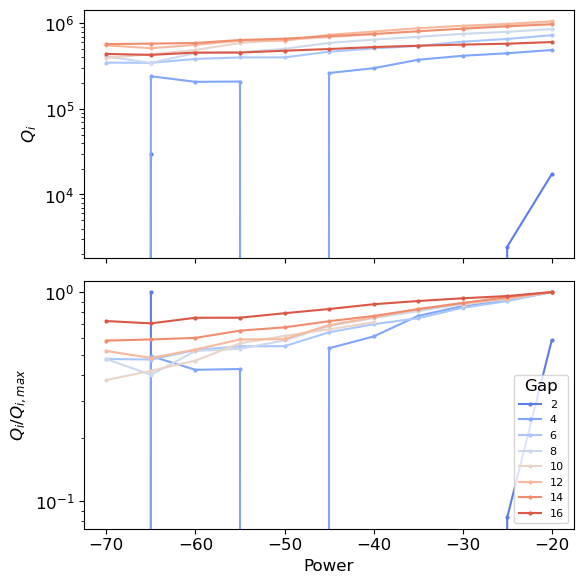

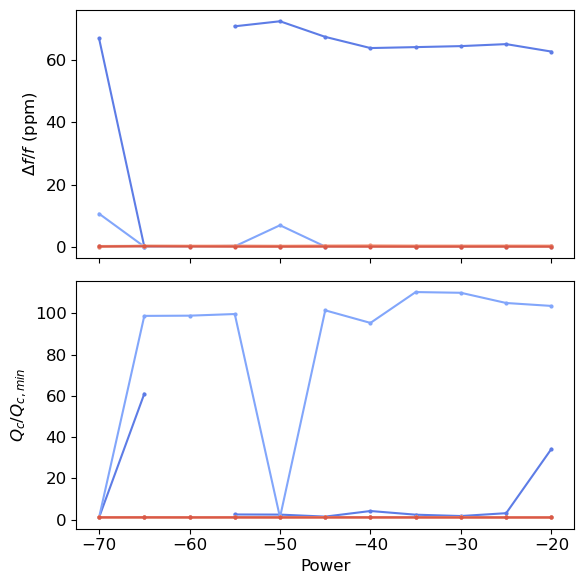

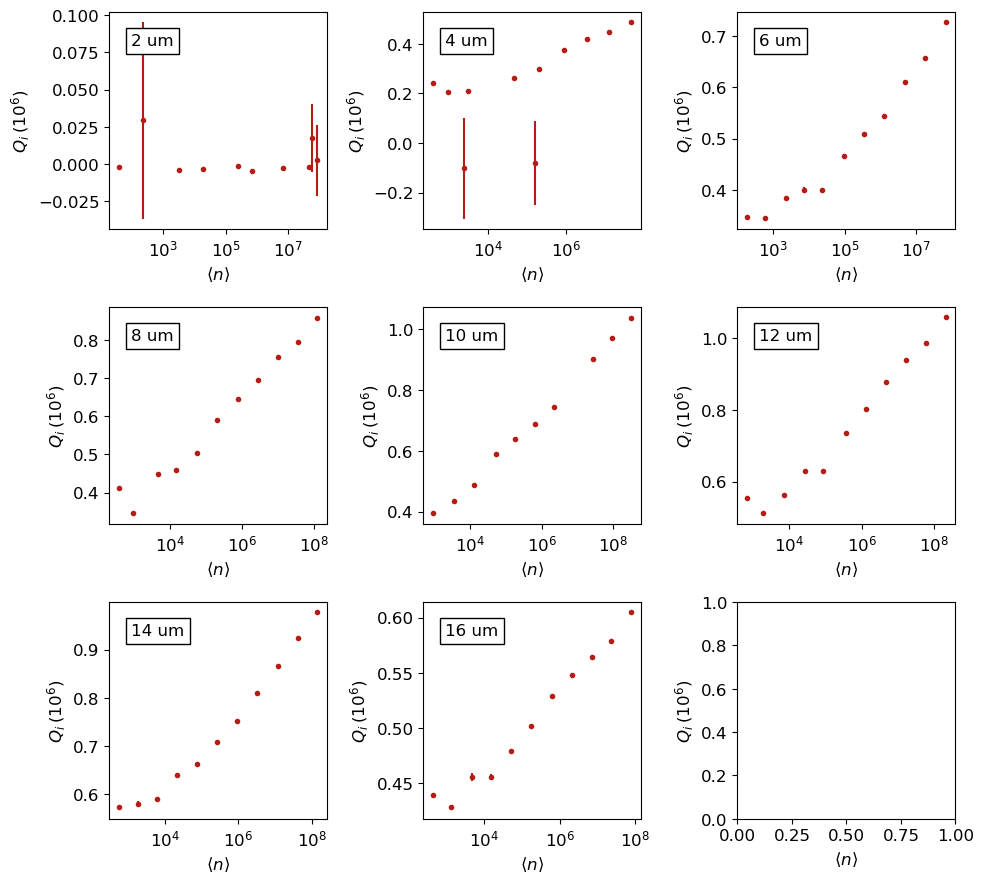

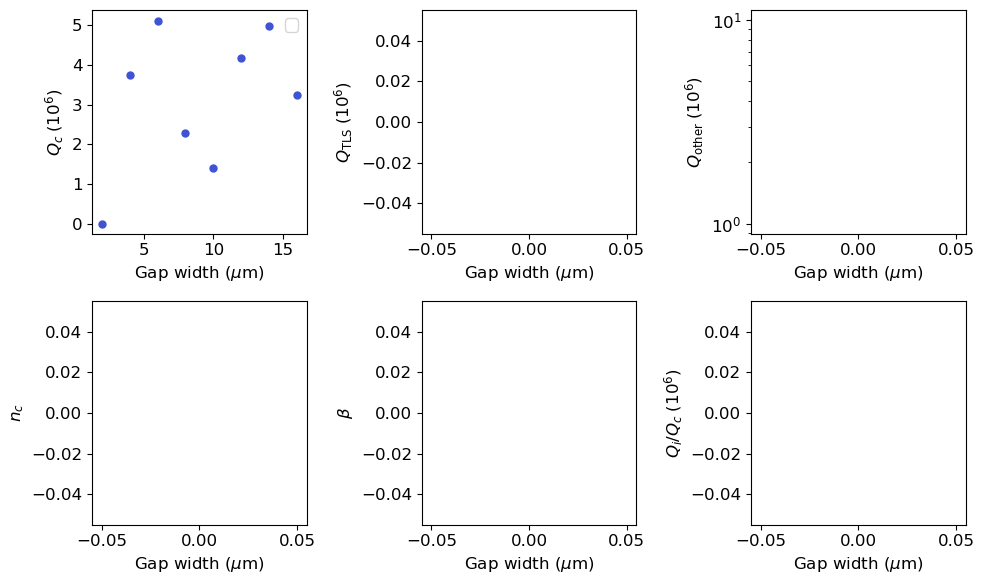

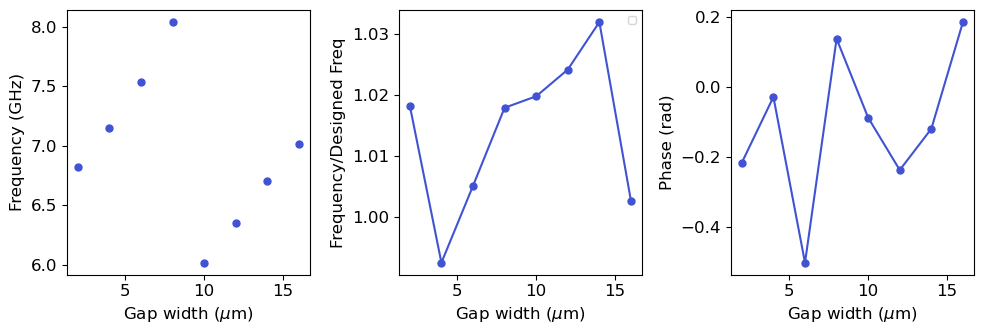

In [ ]:
#%matplotlib widget
%matplotlib inline
ana_res.plot_power(res_params, params, img_pth, use_pitch=True)

max_power = [10, 0, 0, 0,-15, -10, -10, 0]
#min_power = [-50, -80, -75, -75, -80, -80, -80, -75]
#min_power = [-80, -80, -80, -80, -90, -90, -75, -90]
min_power = [-70, -75, -80, -80, -90, -90, -90, -75]
#cfg = ana_tls.fit_qi(res_params, params, img_pth) 
cfg = ana_tls.fit_qi(res_params, params, img_pth, name=img_name, min_power_vec = min_power, max_power_vec = max_power) 
# params['qtls0'][2] = float('nan')
# params['qother'][2] = float('nan')

ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)
ana_res.plot_res_pars([params], [''], img_pth, name=img_name)
hy.save_np(params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '.yml')
#hy.save_np(res_params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '_ph.yml')


In [ ]:
res_params[i].keys()

dict_keys(['freqs', 'phs', 'q', 'qi', 'qc', 'qi_phi', 'pow', 'qi_err', 'q_err', 'phs_err', 'qc_err', 'qc_real_err', 'f_err'])

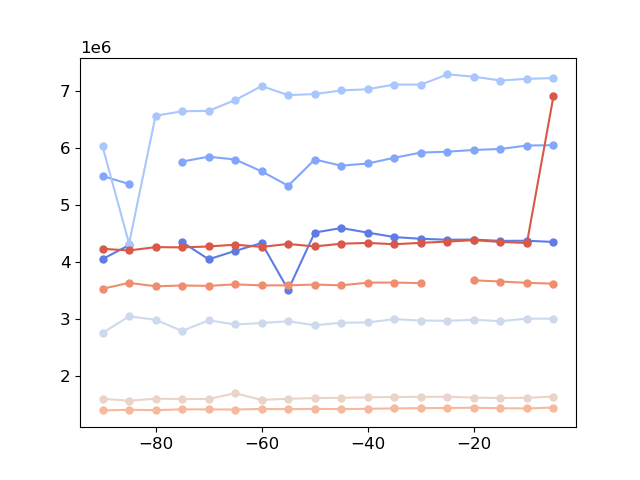

In [37]:
sns.set_palette('coolwarm',8)
fig, ax= plt.subplots(1,1)
for i in range(len(res_params)):
    ax.plot(res_params[i]['pow'][0],res_params[i]['qc'][0],'.-')


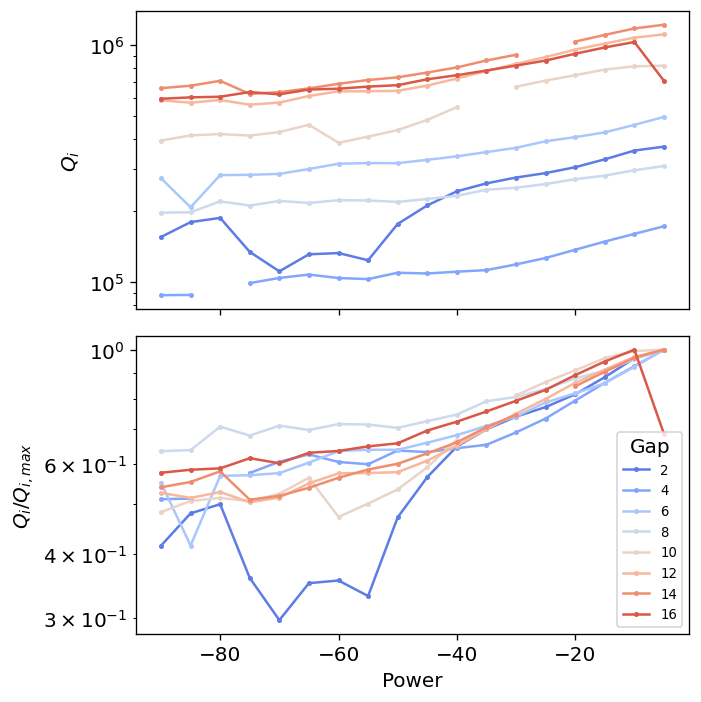

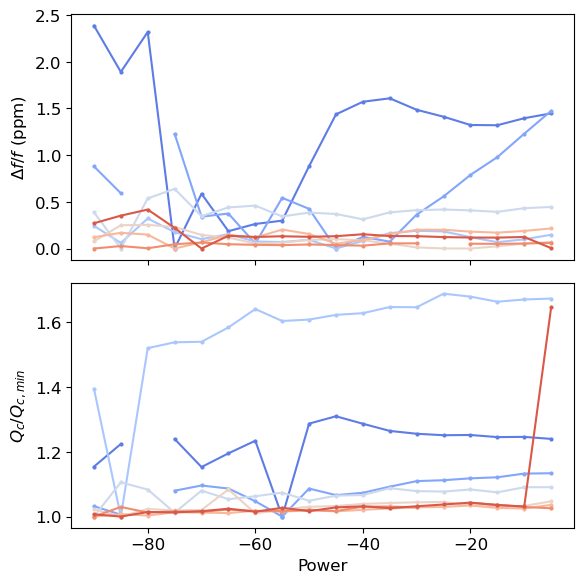

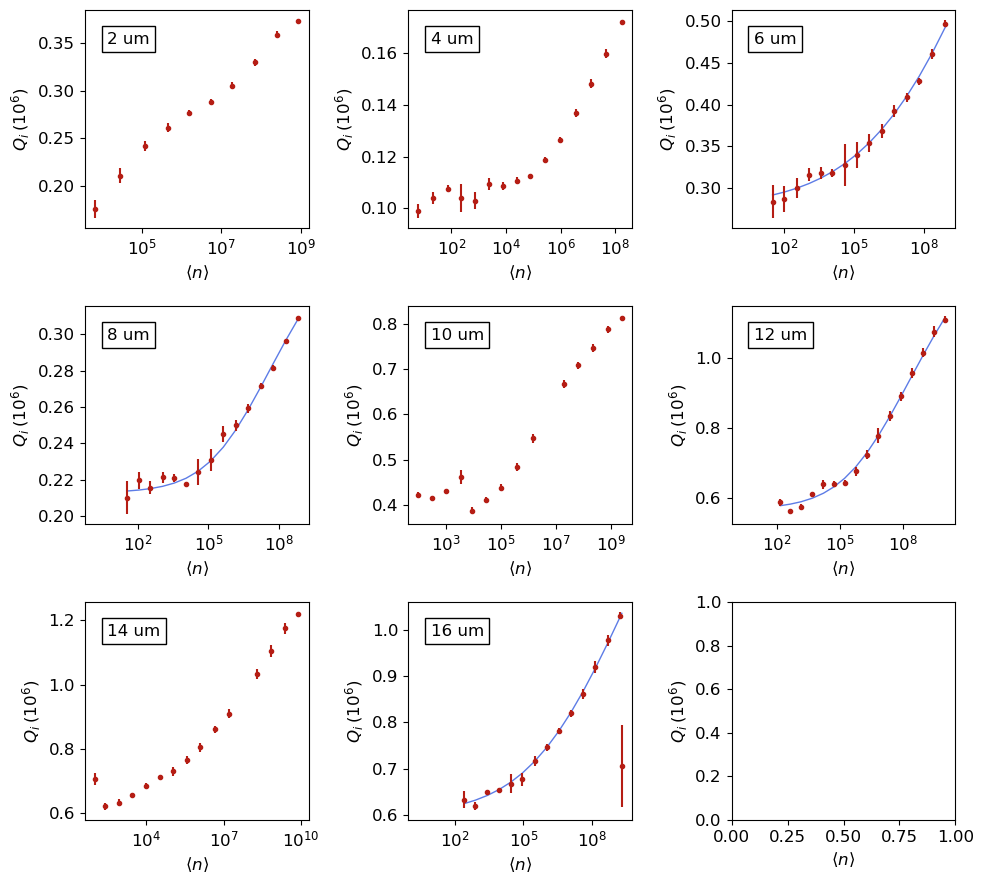

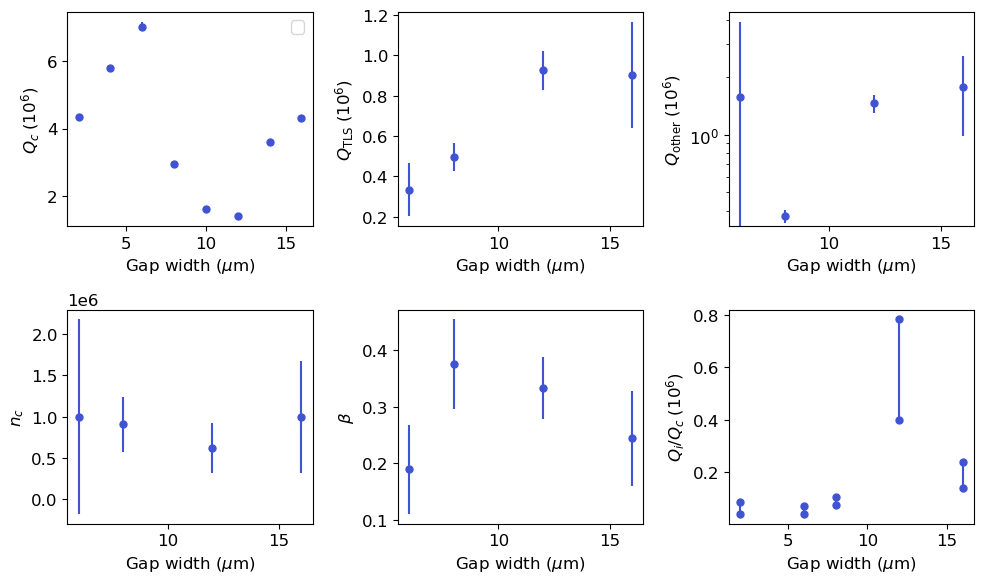

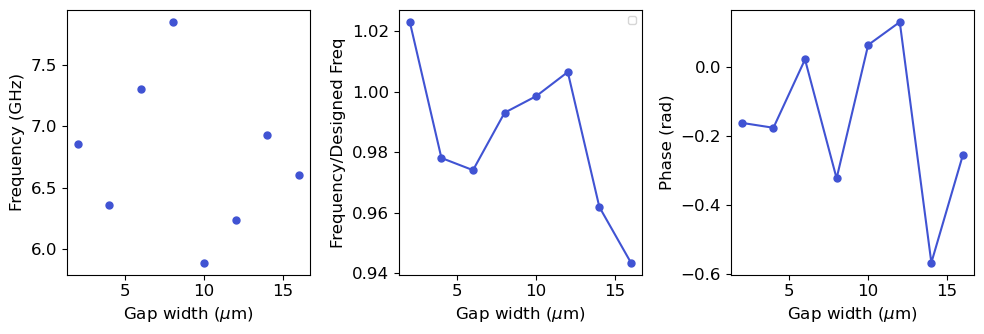

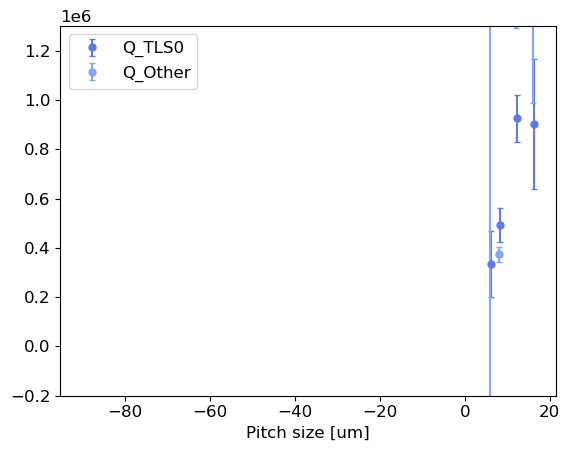

In [ ]:
pitch_list = params['pitch']
qtls0 = params['qtls0']
qtls0_err = params['qtls0_err']
qother = params['qother']
qother_err = params['qother_err']

%matplotlib inline
plt.errorbar(np.array(pitch_list)+0.2, qtls0, yerr = qtls0_err, fmt='.', label = 'Q_TLS0', capsize = 2)
plt.errorbar(pitch_list, qother, yerr = qother_err, fmt='.', label = 'Q_Other', capsize = 2)
plt.xlabel('Pitch size [um]')
plt.legend()
plt.ylim(-0.2*10**6, 1.3*10**6)
plt.show()




### Plot with different max and min power for each resonator 

Failed!
Failed!
Failed!
Failed!


/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_tls.py:229: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, np.nanmax(params["qother"] / 1e6) * 1.1)
/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/materials-software/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_tls.py:233: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, np.nanmax(params["qother"] / 1e6) * 1.2)


UnboundLocalError: cannot access local variable 'fnames' where it is not associated with a value

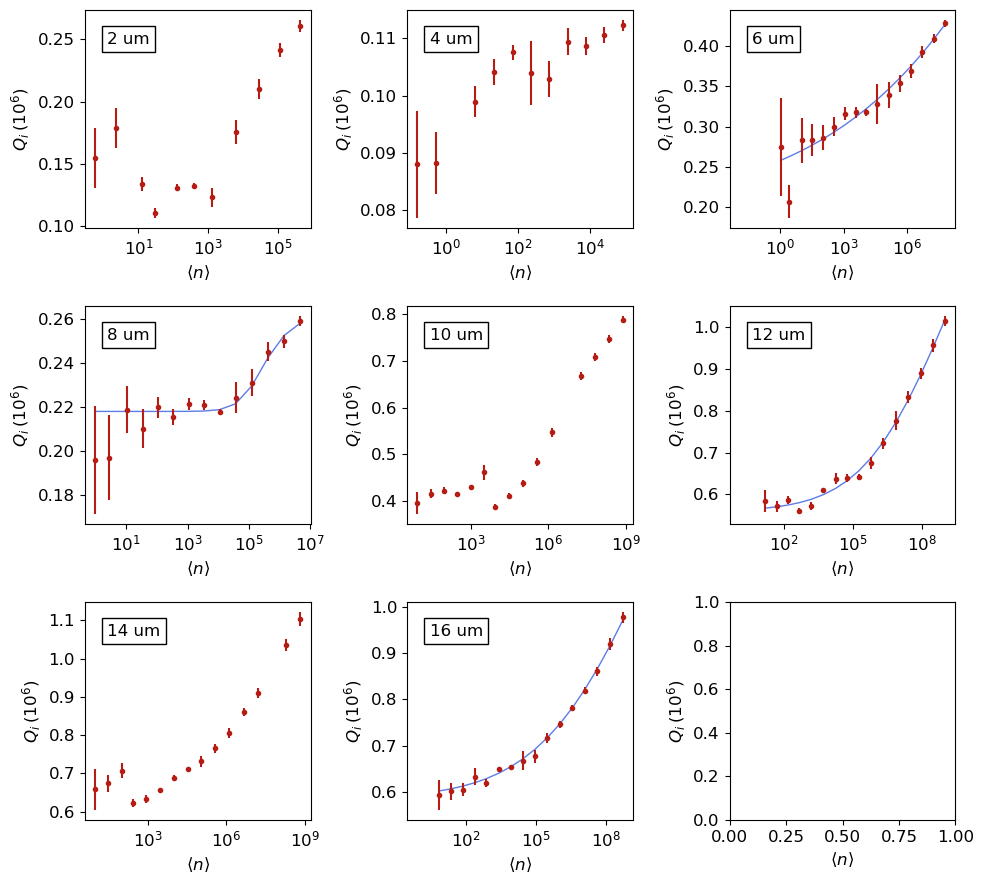

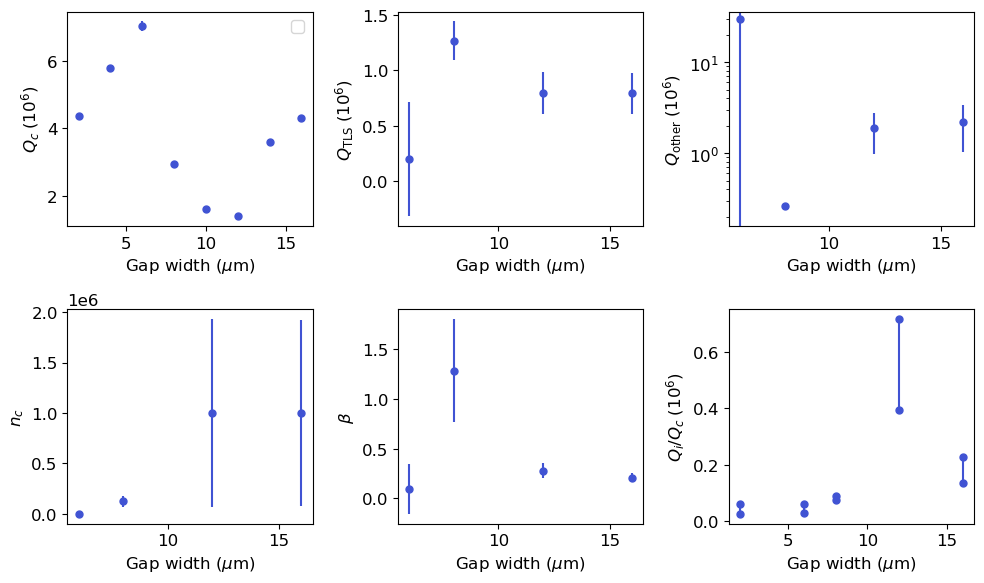

In [39]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)

### Print out info for running scans

In [ ]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(lw)
print(freq)

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ana_res.plot_res_pars(plist, labs,img_pth)


## Single resonators

### Get list of resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,5}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ana_res.get_resonators(directories[0],pth, pattern0)

In [ ]:
import os

fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()
files = os.listdir('C:\\_python\\')
print(files)

Single resonator

In [ ]:
data = ana_res.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ana_res.plot_raw_data(data)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data = ana_res.grab_data(pth+directories[0], file_list[i])       
    ana_res.plot_raw_data(data)
    #output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  
7.714986

In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   
ana_res.plot_raw_data(data)

## Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ana_res.get_temp_list(pth_base, max_temp=1500)
res_params = ana_res.analyze_sweep(directories)

ana_res.plot_power_temp(res_params,i,params,img_pth)